In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st


In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\chaha\Downloads\Projects-20240722T093004Z-001\Projects\heart_disease\Heart Disease\dataset.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
# Rename columns 
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
              'thalach', 'exang', 'oldpeak', 'slope', 'target']

# Feature and Target Separation
X = df.drop('target', axis=1)
y = df['target']


In [7]:
# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Spliting of Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [10]:
# Save model & scaler
joblib.dump(model, "rf_model.pkl")
joblib.dump(scaler, "rf_scaler.pkl")

['rf_scaler.pkl']

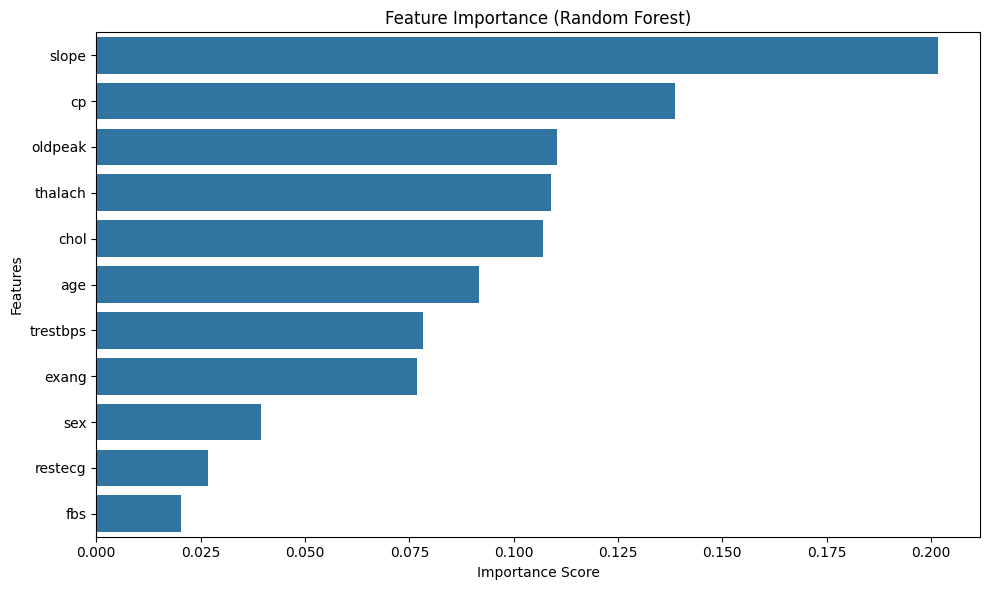

In [11]:
# Feature Importance Plot
importances = model.feature_importances_
features = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [12]:
# Make Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9369747899159664

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       107
           1       0.93      0.96      0.94       131

    accuracy                           0.94       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.94      0.94      0.94       238


 Confusion Matrix:
 [[ 97  10]
 [  5 126]]
